### **Google drive helper to load data**



<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://drive.google.com/open?id=1Ys1UOUaoezhVQyPmOODRObxPqZp0ijry"><img src="https://sites.google.com/a/bhuhsd.net/jessica-rapetti-u-s-government-economics-eportfolio-bhhs2014/_/rsrc/1421979558598/s6-unit-2-the-goals-and-the-origins-of-our-government-1/home/google%20drive.png?height=30&width=50" /> Dataset link</a>
  </td>
</table>


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!unzip -q "/content/drive/My Drive/Multi_Label_dataset.zip"



---




In [0]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import PIL
%matplotlib inline

In [4]:
train = pd.read_csv("Multi_Label_dataset/train.csv")  
train.head()

,Id,Genre,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,N/A,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,tt0086425,"['Comedy', 'Drama']",0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,tt0085549,"['Drama', 'Romance', 'Music']",0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2,tt0086465,['Comedy'],0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,tt0086567,"['Sci-Fi', 'Thriller']",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,tt0086034,"['Action', 'Adventure', 'Thriller']",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7254 entries, 0 to 7253
Data columns (total 27 columns):
Id             7254 non-null object
Genre          7254 non-null object
Action         7254 non-null int64
Adventure      7254 non-null int64
Animation      7254 non-null int64
Biography      7254 non-null int64
Comedy         7254 non-null int64
Crime          7254 non-null int64
Documentary    7254 non-null int64
Drama          7254 non-null int64
Family         7254 non-null int64
Fantasy        7254 non-null int64
History        7254 non-null int64
Horror         7254 non-null int64
Music          7254 non-null int64
Musical        7254 non-null int64
Mystery        7254 non-null int64
N/A            7254 non-null int64
News           7254 non-null int64
Reality-TV     7254 non-null int64
Romance        7254 non-null int64
Sci-Fi         7254 non-null int64
Short          7254 non-null int64
Sport          7254 non-null int64
Thriller       7254 non-null int64
War            7

## Data Preparation


*   Loading the images with id
*   Normalize the data
*   Construct train and test set


In [6]:
img_w = 224
img_h = 224
img_c = 3
train_image = []

for i in tqdm(range(len(train))):
    img = image.load_img('Multi_Label_dataset/Images/'+train['Id'][i]+'.jpg', target_size=(img_w, img_h, img_c))
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
X = np.array(train_image)

100%|██████████| 7254/7254 [00:32<00:00, 225.61it/s]


In [7]:
X.shape

(7254, 224, 224, 3)

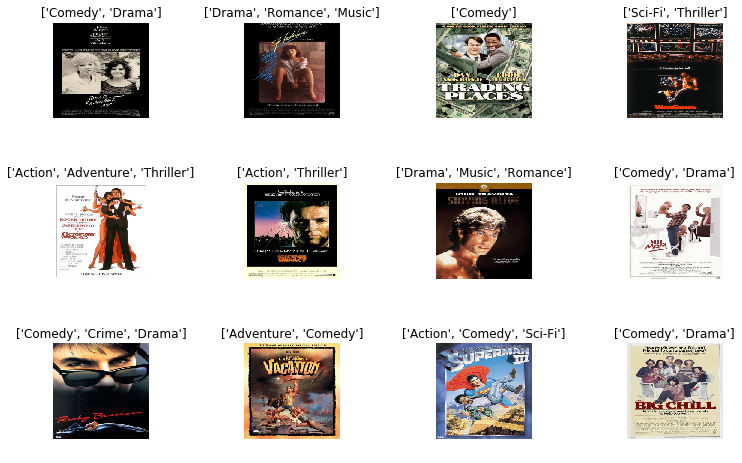

In [8]:
fig = plt.figure(figsize=(12,8))
fig.subplots_adjust(hspace=0.4, wspace=1)

rows = 3
cols = 4

for i in range(0,12):
  fig.add_subplot(rows, cols, i+1)
  plt.title(train['Genre'][i])
  plt.axis('off')
  plt.imshow(X[i])

In [9]:
y = np.array(train.drop(['Id', 'Genre'],axis=1))
y.shape

(7254, 25)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [0]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(5, 5), activation="relu", input_shape=(img_w,img_h,img_c)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(25, activation='sigmoid'))